**Projeto de machine learning -- Prever futuros valores das
ações da empresa tesla**

---
Autora: Lara Kelly

Objetivo: Prever valores contínuos das ações da tesla usando técnica de regressão.

link para download da base de dados: https://www.kaggle.com/datasets/adilshamim8/tesla-stock-price-history



Importação das bibliotecas para uso

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Explicação das colunas da base de dados:**

**Data:** Data do calendário para os registro das ações, individualmente.

**Abrir:** Valor R$ inicial da ação no ínicio da negociação.

**Fechar:** Valor R$ final pelo qual a ação foi negociada durante o dia.

**Alta:** Representa o maior valor que a ação atingiu durante determinado dia.

**Baixa:** Representa o menor valor atingido pela ação durante determinado dia.

**Volume:** Representa a quantidade de ações negociadas naquele dia em específico.


Preparação da base de dados

In [5]:
#caminho=('https://drive.google.com/file/d/1hd_9xyPmg5IihonFVahWSso741ZJOAta/view?usp=sharing')

df_historico=pd.read_csv('/content/Tesla_stock_data.csv')

# renomeação das colunas.
df_historico.rename(columns={'Date':'Data'},inplace=True)
df_historico.rename(columns={'Close':'Fechar'},inplace=True)
df_historico.rename(columns={'High':'Alta'},inplace=True)
df_historico.rename(columns={'Low':'Baixa'},inplace=True)
df_historico.rename(columns={'Open':'Abrir'},inplace=True)

df_historico

,Data,Fechar,Alta,Baixa,Abrir,Volume
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500
...,...,...,...,...,...,...
3811,2025-08-22,340.010010,340.250000,319.690002,321.660004,94016300
3812,2025-08-25,346.600006,349.529999,335.029999,338.899994,86670000
3813,2025-08-26,351.670013,351.899994,343.720001,344.929993,76651600
3814,2025-08-27,349.600006,355.390015,349.160004,351.940002,65519000


**Tratamento e análise exploratória**

In [6]:
df_historico.isnull().sum()

,0
Data,0
Fechar,0
Alta,0
Baixa,0
Abrir,0
Volume,0


In [7]:
# visualização do tipo das colunas.
df_historico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3816 entries, 0 to 3815
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Data    3816 non-null   object 
 1   Fechar  3816 non-null   float64
 2   Alta    3816 non-null   float64
 3   Baixa   3816 non-null   float64
 4   Abrir   3816 non-null   float64
 5   Volume  3816 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 179.0+ KB


In [8]:

# verificando maior valor durante a ação
filtro=df_historico['Alta'].max()

# aplicando filtro que exiba todas as colunas correspondente ao filtro.
df_historico[df_historico['Alta']==filtro]

# Menor valor entre as ações
filtro2=df_historico['Baixa'].min()

# Todas as colunas que correspondem ao filtro2
df_historico[filtro2==df_historico['Baixa']]

# Verificação de dados duplicados
df_historico.duplicated().sum()

np.int64(0)

In [9]:
# Verificando ser a dados duplicados
df_historico.duplicated().sum() # Resultado: Sem dados duplicados

np.int64(0)

Criação e manipulação de tabelas

criação de uma nova coluna: A **Discrepância**  consiste na diferença entre as colunas **"Abrir"** e **"fechar"**, o intuito é exibir a discrepância
entre o valor inicial da ação e o valor final.

In [10]:

df_historico['Discrepância']=df_historico['Abrir']-df_historico['Fechar']*100
df_historico.head(10)

,Data,Fechar,Alta,Baixa,Abrir,Volume,Discrepância
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500,-158.000031
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500,-157.147370
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000,-144.733332
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000,-126.466664
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500,-106.066667
5,2010-07-07,1.053333,1.108667,0.998667,1.093333,103825500,-104.239971
6,2010-07-08,1.164000,1.168000,1.038000,1.076000,115671000,-115.324003
7,2010-07-09,1.160000,1.193333,1.103333,1.172000,60759000,-114.827997
8,2010-07-12,1.136667,1.204667,1.133333,1.196667,33037500,-112.470034
9,2010-07-13,1.209333,1.242667,1.126667,1.159333,40201500,-119.773961


In [11]:
# menor discrepância
filtro_menor=df_historico['Discrepância'].min()
df_historico[df_historico['Discrepância']<=filtro_menor]

,Data,Fechar,Alta,Baixa,Abrir,Volume,Discrepância
3642,2024-12-17,479.859985,483.98999,457.51001,475.899994,131223000,-47510.098541


In [12]:
# maior discrepância
filtro_maior=df_historico['Discrepância'].max()
df_historico[df_historico['Discrepância']==filtro_maior]

,Data,Fechar,Alta,Baixa,Abrir,Volume,Discrepância
5,2010-07-07,1.053333,1.108667,0.998667,1.093333,103825500,-104.239971


Criação de um novo **Dataframe** : O novo dataframe possuirá  as colunas: Data, abrir, fechar, volume e discrepância.
Essas colunas seram usadas na criação do  **Modelo**





In [13]:
df_nova_tabela_tesla=df_historico[['Data','Abrir','Volume','Fechar','Discrepância']]
df_nova_tabela_tesla

,Data,Abrir,Volume,Fechar,Discrepância
0,2010-06-29,1.266667,281494500,1.592667,-158.000031
1,2010-06-30,1.719333,257806500,1.588667,-157.147370
2,2010-07-01,1.666667,123282000,1.464000,-144.733332
3,2010-07-02,1.533333,77097000,1.280000,-126.466664
4,2010-07-06,1.333333,103003500,1.074000,-106.066667
...,...,...,...,...,...
3811,2025-08-22,321.660004,94016300,340.010010,-33679.340973
3812,2025-08-25,338.899994,86670000,346.600006,-34321.100616
3813,2025-08-26,344.929993,76651600,351.670013,-34822.071350
3814,2025-08-27,351.940002,65519000,349.600006,-34608.060608


 O loop a seguir, tem o intuito de analisar de forma visual os valores correspondente de cada ano

In [14]:
# Converte 'Data' para o tipo datetime
df_nova_tabela_tesla['Data'] = pd.to_datetime(df_nova_tabela_tesla['Data'])

# Permite criar uma nova coluna para realizar o loop
df_nova_tabela_tesla['Ano'] = df_nova_tabela_tesla['Data'].dt.year


ano_inicial=2010
ano_final=2025


for  n in range(ano_inicial,ano_final+1):
  df_anos=df_nova_tabela_tesla[df_nova_tabela_tesla['Ano'] == n]

  # Ao visualiza as 5 primeiras e  as 5 últimas linhas, observei que o anos 2023/2024/2025 possuem um maior valor R$ em ações com valores de "fechamento" alto.
  print(df_anos)

          Data     Abrir     Volume    Fechar  Discrepância   Ano
0   2010-06-29  1.266667  281494500  1.592667   -158.000031  2010
1   2010-06-30  1.719333  257806500  1.588667   -157.147370  2010
2   2010-07-01  1.666667  123282000  1.464000   -144.733332  2010
3   2010-07-02  1.533333   77097000  1.280000   -126.466664  2010
4   2010-07-06  1.333333  103003500  1.074000   -106.066667  2010
..         ...       ...        ...       ...           ...   ...
125 2010-12-27  1.868000  139528500  1.703333   -168.465302  2010
126 2010-12-28  1.723333   60844500  1.760667   -174.343364  2010
127 2010-12-29  1.802000   49788000  1.848667   -183.064703  2010
128 2010-12-30  1.846667   30616500  1.766667   -174.820034  2010
129 2010-12-31  1.771333   21268500  1.775333   -175.761972  2010

[130 rows x 6 columns]
          Data     Abrir    Volume    Fechar  Discrepância   Ano
130 2011-01-03  1.789333  19245000  1.774667   -175.677369  2011
131 2011-01-04  1.777333  17811000  1.778000   -176.02

/tmp/ipython-input-1025084853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nova_tabela_tesla['Data'] = pd.to_datetime(df_nova_tabela_tesla['Data'])
/tmp/ipython-input-1025084853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nova_tabela_tesla['Ano'] = df_nova_tabela_tesla['Data'].dt.year


In [15]:
df_nova_tabela_tesla['Discrepância'].mean()

df_nova_tabela_tesla['Abrir'].std()


116.2602858121266

In [16]:

df_historico['Data']=pd.to_datetime(df_historico['Data'])
df_historico['Data'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3816 entries, 0 to 3815
Series name: Data
Non-Null Count  Dtype         
--------------  -----         
3816 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 29.9 KB


Criando gráficos, para melhor visualização

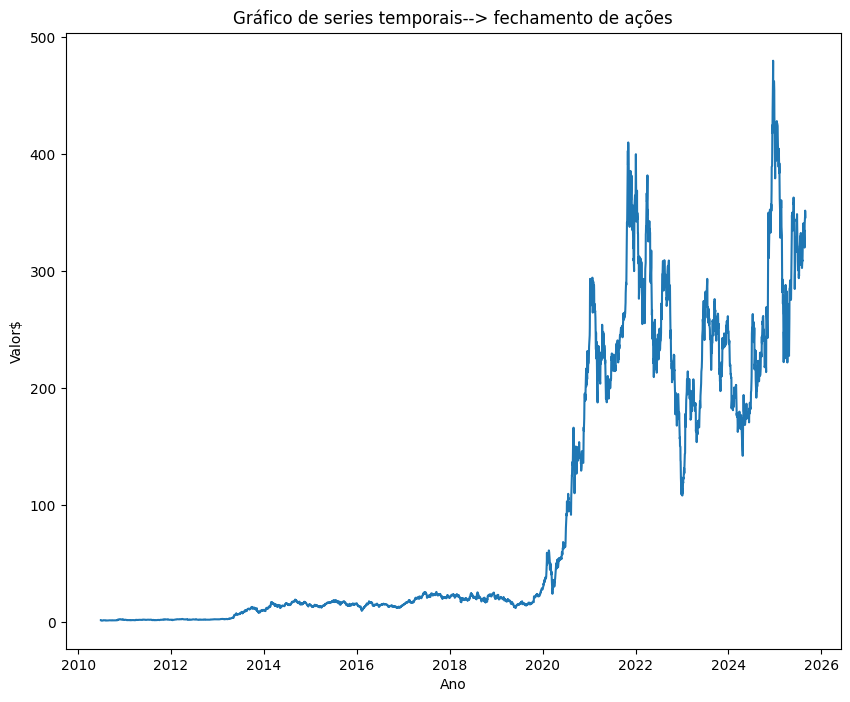

In [17]:


plt.figure(figsize=(10,8))
plt.plot(df_historico['Data'], df_historico['Fechar'])
plt.title('Gráfico de series temporais--> fechamento de ações')
plt.xlabel('Ano')
plt.ylabel('Valor$')
plt.show()


O gráfico tem como resposta um crescimento no valor de **negocição da empresa a parte do ano 2020**


O gráfico a seguir possui como objetivo exibir através das linhas o valor de abertura e o valor de fechamento do ano x.


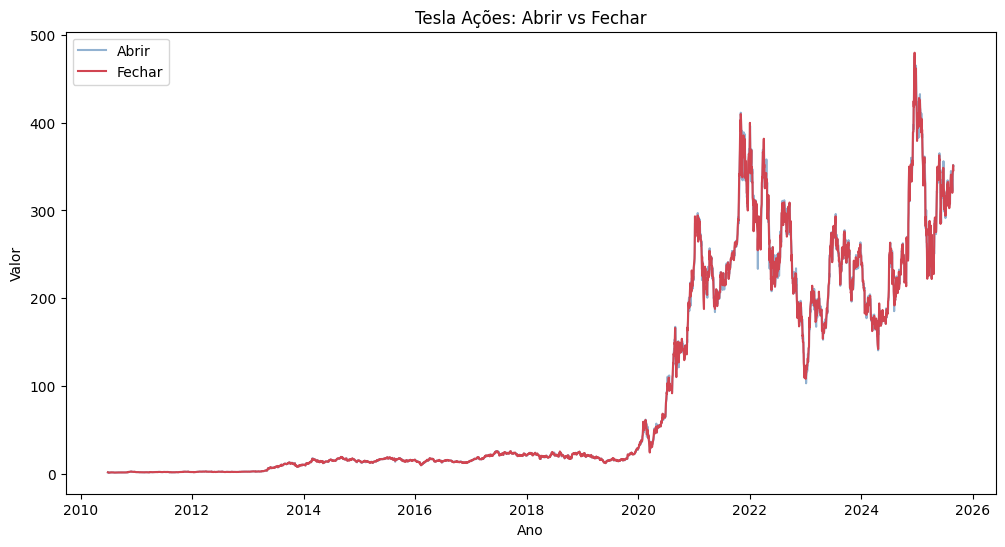

In [18]:


plt.figure(figsize=(12, 6))
plt.plot(df_nova_tabela_tesla['Data'], df_nova_tabela_tesla['Abrir'], label='Abrir', color='#92b2d1')
plt.plot(df_nova_tabela_tesla['Data'], df_nova_tabela_tesla['Fechar'], label='Fechar', color='#d14551')

plt.xlabel('Ano')
plt.ylabel('Valor')
plt.title('Tesla Ações: Abrir vs Fechar')
plt.legend()
plt.show()

No gráfico é possivel percebe que o valor de **fechamento**  está acima ou igual ao valor de **abertura** de forma crescente ao longo do tempo, mas oscilando constantemente.
 Demonstrando grande evolução aparte do ano 2021, as ações tiveram valorização.
**A oscilação possui grande influência de acontecimentos externo do mercado.**

O gráfico abaixo permite visualizar a média anula dos valores de **fechamento**

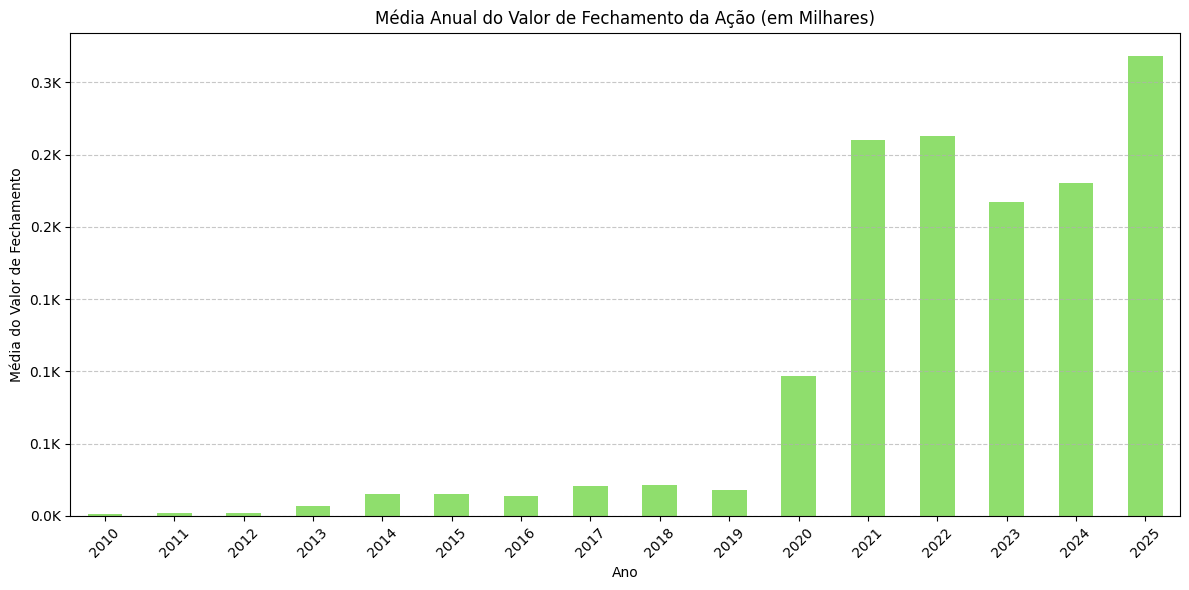

In [19]:
import matplotlib.ticker as mticker # Importar para formatação do eixo

# criação do terceiro gráfico. ---> gráfico de barra

# cálculo da média
media_anual=df_nova_tabela_tesla.groupby('Ano')['Fechar'].mean()
media_anual #Ao visualizar a média é possivel perceber o valor de fechamento crescendo a parte do ano 2017 e tendo um salto maior após o ano de 2021.



plt.figure(figsize=(12, 6))
ax = media_anual.plot(kind='bar', color='#8fde6d')

plt.title('Média Anual do Valor de Fechamento da Ação (em Milhares)')
plt.xlabel('Ano')
plt.ylabel('Média do Valor de Fechamento')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#  Formatação do Eixo Y para exibir em milhares
formatter = mticker.FormatStrFormatter('%.0fK') # Formata para inteiro e adiciona 'K'

ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pt: f'{x/1000:.1f}K'))


plt.tight_layout()
plt.show()

No gráfico é possivel observa que o ano de **2022** e **2025** obtiveram um valor médio mais alto. Ambos os anos tiveram influência de inovações tecnológicas,valorização no mercado entre diversos fatores.


 O gráfico abaixo, possui como objetivo exibir tendência de crescimento ou diminuição.
 Observando o **volume** de ações negociadas durante o ano X.

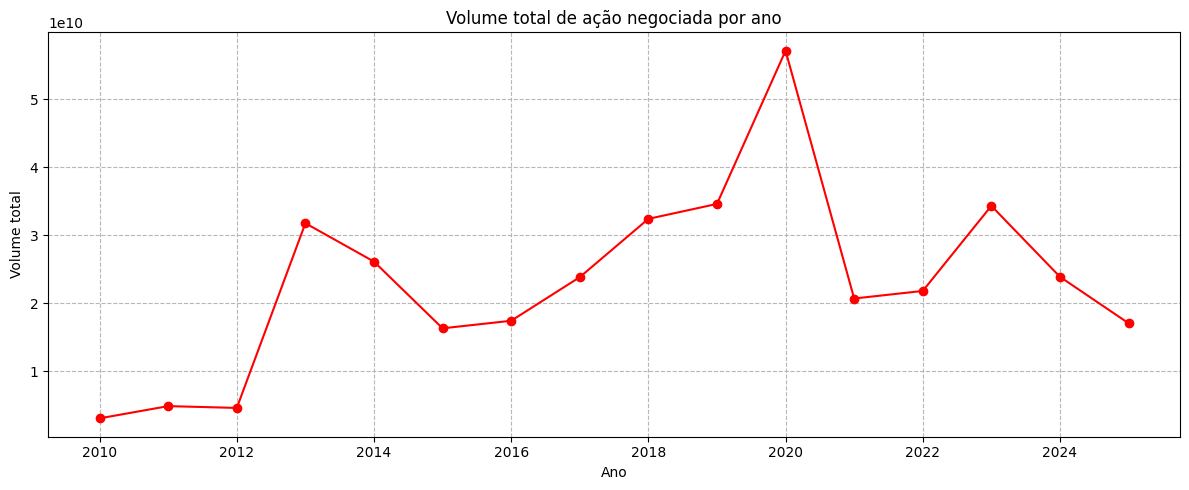

In [20]:


# cálculo do volume total por ano
volume_total_anual=df_nova_tabela_tesla.groupby('Ano')['Volume'].sum()


plt.figure(figsize=(12,5))
plt.plot(volume_total_anual, color='red', marker='o')
plt.title('Volume total de ação negociada por ano')
plt.xlabel('Ano')
plt.ylabel('Volume total')

plt.grid(True,linestyle='--',alpha=0.9)
plt.tight_layout()
plt.show()


 O gráfico demonstram uma clara variação no volume de negociação anual, refletindo diferentes níveis de interesse e atividade ao longo do tempo.
 Identificamos picos de volume em **2013** e **2020.**
  Em 2020, ano em que o elevado volume de negociações coincidiu com o leve crescimento  e valorização das ações
  sugerindo uma relação direta entre esses fatores.

  Com base em informações da empresa, no ano de **2020** houve **bareatamento** nos valores das ações, o que explicar o **pico de negociação**. Mas nos anos seguintes é possivel observa aumento nos valores das ações, **diminuindo sua negociação**, além dos impactos do mercado.


O gráfico de barra exibirá a média anula de **volume** negociados.

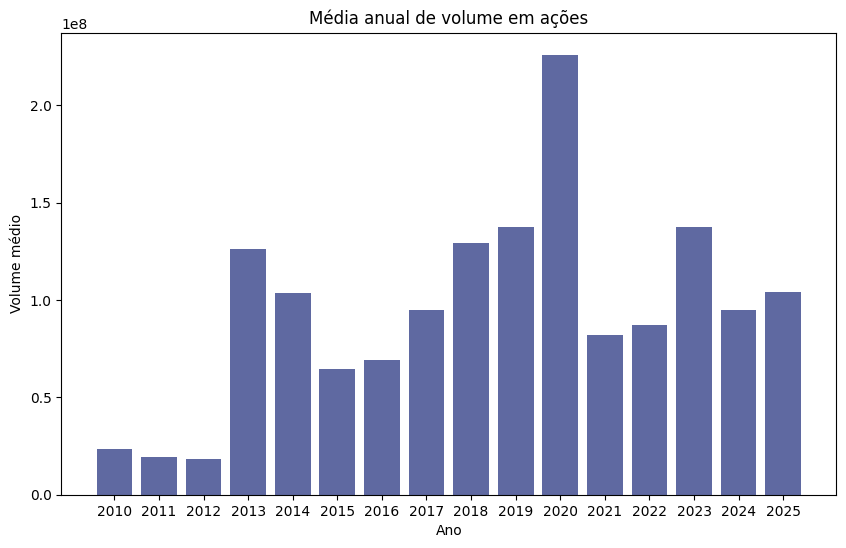

In [21]:
# Média da coluna volume
# pd.options.display.float_format='{:.2f}'.format
media_volume=df_nova_tabela_tesla.groupby ('Ano')['Volume'].mean()
media_volume



plt.figure(figsize=(10,6))
plt.bar(media_volume.index,
media_volume.values,
color='#5f69a1')

plt.title('Média anual de volume em ações')
plt.xlabel('Ano',fontsize=10)
plt.ylabel('Volume médio',fontsize=10)
plt.xticks(media_volume.index)

plt.show()

No gráfico de barra é exibido a média anul. É possivél visualizar que o ano **2020** teve o pico mais alto, esse ocorrido se deve pela a ocasião de **queda** nos valores das ações.

In [22]:
df_nova_tabela_tesla

,Data,Abrir,Volume,Fechar,Discrepância,Ano
0,2010-06-29,1.266667,281494500,1.592667,-158.000031,2010
1,2010-06-30,1.719333,257806500,1.588667,-157.147370,2010
2,2010-07-01,1.666667,123282000,1.464000,-144.733332,2010
3,2010-07-02,1.533333,77097000,1.280000,-126.466664,2010
4,2010-07-06,1.333333,103003500,1.074000,-106.066667,2010
...,...,...,...,...,...,...
3811,2025-08-22,321.660004,94016300,340.010010,-33679.340973,2025
3812,2025-08-25,338.899994,86670000,346.600006,-34321.100616,2025
3813,2025-08-26,344.929993,76651600,351.670013,-34822.071350,2025
3814,2025-08-27,351.940002,65519000,349.600006,-34608.060608,2025


In [23]:
# Ano de maior negociação em volume.
volume_max= df_nova_tabela_tesla.groupby('Ano')['Volume'].sum()
volume_max

print(volume_max) #---->  o volume total em 2020: 57158737200, isso reforça o alto volume de negociações.

menor_valor=df_nova_tabela_tesla.groupby('Ano')['Fechar'].sum()
print(menor_valor) #----> o valor total de fechamento no ano de 2020: 24456.42,
                   # demonstrando menor valor R$ em compração com os próximos 5 anos sucessor.

Ano
2010     3080536500
2011     4878526500
2012     4611735000
2013    31781188500
2014    26134819500
2015    16323267000
2016    17435425500
2017    23850471000
2018    32424582000
2019    34620726000
2020    57158737200
2021    20708071500
2022    21821019600
2023    34337910000
2024    23899546500
2025    17072752800
Name: Volume, dtype: int64
Ano
2010      202.295999
2011      450.320002
2012      519.476660
2013     1753.940662
2014     3751.928665
2015     3864.720658
2016     3524.090007
2017     5259.559326
2018     5309.652658
2019     4595.307343
2020    24456.419268
2021    65519.536758
2022    66036.363327
2023    54368.809891
2024    58114.970078
2025    52224.819962
Name: Fechar, dtype: float64


O gráfico abaixo exibir anos que possuem menores valores R$ de fechamento.

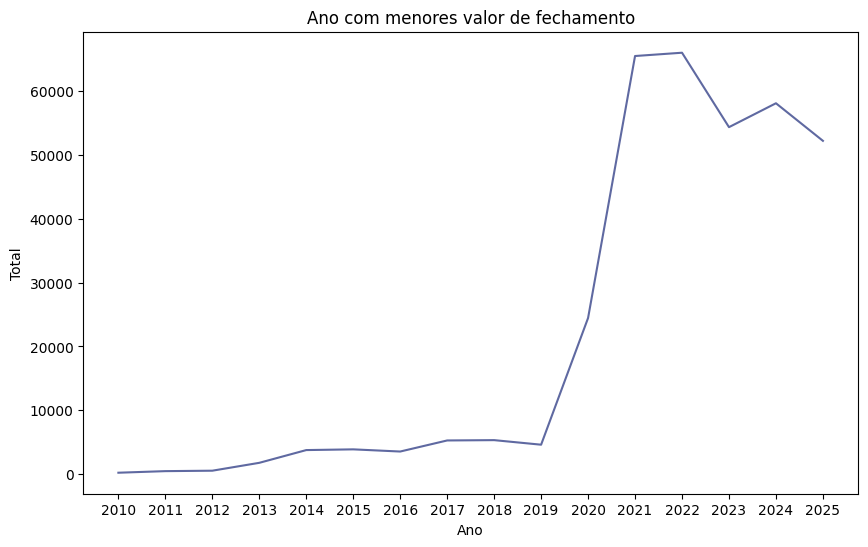

In [24]:

plt.figure(figsize=(10,6))
plt.plot(menor_valor,
color='#5f69a1')

plt.title('Ano com valores de fechamento ')
plt.xlabel('Ano',fontsize=10)
plt.ylabel('Total',fontsize=10)
plt.xticks(media_volume.index)


plt.show()

É possivel nota crescimento logo após o ano de 2019, **mas o ano de 2020 possui ainda baixo valor em comparação aos anos seguintes**

In [26]:
df_nova_tabela_tesla

,Data,Abrir,Volume,Fechar,Discrepância,Ano
0,2010-06-29,1.266667,281494500,1.592667,-158.000031,2010
1,2010-06-30,1.719333,257806500,1.588667,-157.147370,2010
2,2010-07-01,1.666667,123282000,1.464000,-144.733332,2010
3,2010-07-02,1.533333,77097000,1.280000,-126.466664,2010
4,2010-07-06,1.333333,103003500,1.074000,-106.066667,2010
...,...,...,...,...,...,...
3811,2025-08-22,321.660004,94016300,340.010010,-33679.340973,2025
3812,2025-08-25,338.899994,86670000,346.600006,-34321.100616,2025
3813,2025-08-26,344.929993,76651600,351.670013,-34822.071350,2025
3814,2025-08-27,351.940002,65519000,349.600006,-34608.060608,2025


# A seguir aplicação do modelo **Random forest**


In [27]:

# Importação das bibliotecas necessárias.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Separação dos dados --> **variáveis independetes**(usadas para ensina o modelo) e

 --> **variável dependente** (Variável que o modelo deve prever o valor)

In [28]:
# variáveis independentes
x=df_historico[['Abrir','Alta','Volume','Discrepância']]
# variável dependente
y=df_historico['Fechar']


# normalização
scaler =StandardScaler()
x_scaler=scaler.fit_transform(x)


# Separa Treino e teste
x_treino,x_teste,y_treino,y_teste=train_test_split(
    x,y,test_size=0.2,random_state=42
)

In [29]:
modelo2=RandomForestRegressor(
    n_estimators=90,
    random_state=42,
    max_depth=None,
    n_jobs=-1)

modelo2.fit(x_treino,y_treino)

RandomForestRegressor(n_estimators=90, n_jobs=-1, random_state=42)

In [30]:
# Realizar previsões e avaliar modelo

# Realizando treino do modelo
y_predi_treino=modelo2.predict(x_treino)
y_predi_teste=modelo2.predict(x_teste)

# ____Métricas treino______
mae=mean_absolute_error(y_treino,y_predi_treino)
mse=mean_squared_error(y_treino,y_predi_treino)
rmse=np.sqrt(mse)
r2=r2_score(y_treino,y_predi_treino)

print('Métricas de treino: ')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}\n')


# ____Métricas teste _____
MAE=mean_absolute_error(y_teste,y_predi_teste)
MSE=mean_squared_error(y_teste,y_predi_teste)
RMSE=np.sqrt(mse)
R2=r2_score(y_teste,y_predi_teste)

print('Métricas de teste: ')
print(f'MAE: {MAE:.2f}')
print(f'RMSE: {RMSE:.2f}')
print(f'R²: {R2:.2f}')

Métricas de treino: 
MAE: 0.05
RMSE: 0.27
R²: 1.00

Métricas de teste: 
MAE: 0.10
RMSE: 0.27
R²: 1.00


# Métricas usadas, explicação:
**MAE**: Média das diferenças absolutas entre os valores previsto e valores reais. Quanto mais **próximo do 0**, melhor o resultado.

**RMSE**: Raiz quadrada da média das diferenças quadráticas entre os valores previstos e obervados, tende a dá peso maior aos erros grandes.

**R²**: Indica a proporção da variabilidade, identificando o quanto inserido o modelo está nos dados. Por exemplo, na nossa métrica o resultado de **R²** foi **(1.00)** indicando 100%,tendo uma boa eficiência em explicar os modelos.

Conclusão das métricas:

Apresenta bons resultados sem risco de **sobreajuste**

Visualizando os valores de teste e os valores reais

In [31]:

# Valores de teste
(y_teste*100).head(12)

,Fechar
1078,1713.400078
1957,1931.066704
2694,23124.333191
2002,2285.133362
1213,1456.200027
1104,1724.533272
2654,28480.334473
1694,1700.066757
721,511.733294
949,1383.466721


In [32]:
y_predi_teste[:12]*10

array([ 171.32480982,  192.8799235 , 2313.29183282,  228.43800206,
        145.5339241 ,  172.46304025, 2848.72598606,  169.98310873,
         55.05525854,  138.34933376,  488.34489822,  666.5992775 ])

O modelo acerta com uma boa precisão, em alguns valores seu erro é baixo

O gráfico a seguir representa **ruídos e valores previsto**

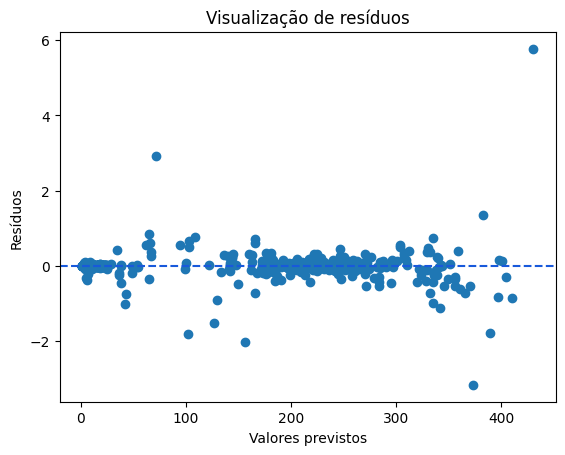

In [33]:


residuos=y_teste-y_predi_teste

plt.scatter(y_predi_teste,residuos)
plt.axhline(0,color='#1859db',linestyle='--')
plt.title('Visualização de resíduos')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')
plt.show()

O gráfico exibir aleatoriamente os dados dispersos em **faixa horizontal uniforme em torno da linha central**, indicando nenhum padrão observado.

O gráfico abaixo representa os valores previsto e os valores reais, ***a linha vermelha indica os valores "ideiais", o que se é esperado do modelo***

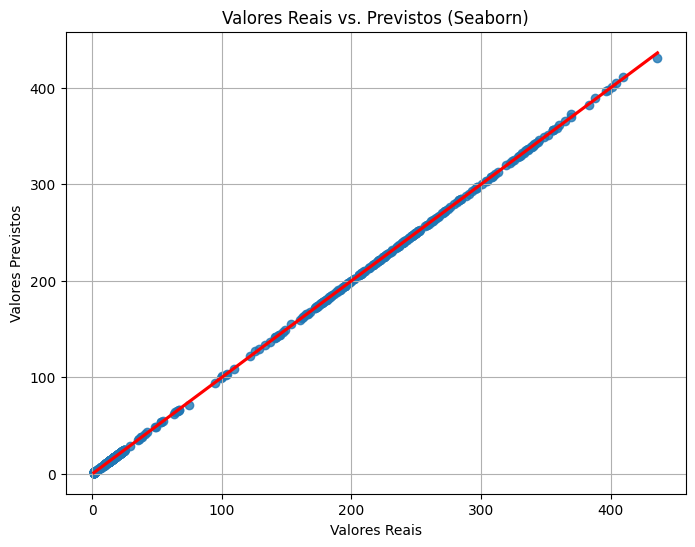

In [34]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x=y_teste, y=y_predi_teste , line_kws={"color": "red"})
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Previstos (Seaborn)")
plt.grid(True)
plt.show()

É apresentado bom resultado, o modelo possui boa previsão.

O gráfico abaixo deve exibir o quanto relacionados estão os valores reais e os valores previsto pelo **modelo**.

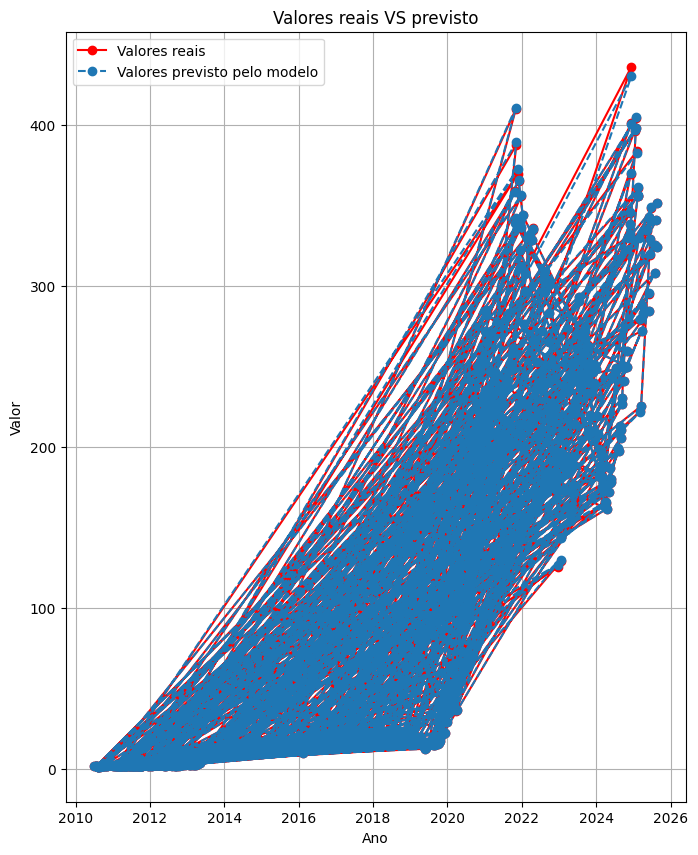

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
plt.plot(df_historico.loc[y_teste.index, 'Data'], y_teste, label='Valores reais', marker='o',color='red')
plt.plot(df_historico.loc[y_teste.index, 'Data'], y_predi_teste, label='Valores previsto pelo modelo', linestyle='--', marker='o')

plt.title('Valores reais VS previsto')
plt.xlabel('Ano')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

plt.show()

Conclusão: a linha de **valor prevista pelo ML**  chega a se iguala ao valor real. Expressando que as linhas estão sobreposta isso deduz que o **modelo tem boa precisão**.


# Conclusão do ML

> O modelo está eficiente, prever valores com precisão tendo erros consideraveis nos valores.


```

 É importa salientar que os valores previsto pelo modelo
possui erros consideraveís, como casas decimais um pouco
diferente dos valores reais.
```


